<hr>

# Welcome to Week 10
<hr>

**Perceptron** is a linear classifier (binary) and is a single layer neural network. A multi-layer perceptron is called a neural network.[More detils](https://scikit-learn.org/stable/modules/neural_networks_supervised.html)
<hr>

<img src="figure/Perceptron algorithm image 1.png"
     alt="Markdown Monster icon"
     style="float: left; margin-right: 10px;" />
     
 <br>


### Data preparation

In [1]:
import pandas as pd
df=pd.read_csv("data/HR-Employee-Attrition.csv")
df.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]

### Class balance checking 

<AxesSubplot:xlabel='Attrition', ylabel='count'>

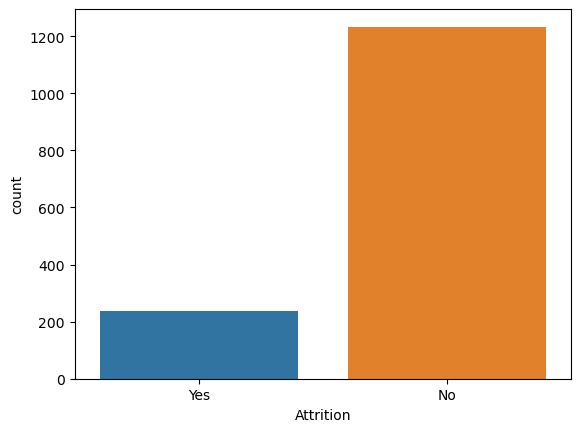

In [2]:
import seaborn as sns
sns.countplot(x='Attrition', data=df)

### Removing unnecessary 

In [3]:
df.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis="columns", inplace=True)
categorical_col = []
for column in df.columns:
    if df[column].dtype == object and len(df[column].unique()) <= 50:
        categorical_col.append(column)
        
df['Attrition'] = df.Attrition.astype("category").cat.codes

In [4]:
df.head()

Age  Attrition     BusinessTravel  DailyRate              Department  \
0   41          1      Travel_Rarely       1102                   Sales   
1   49          0  Travel_Frequently        279  Research & Development   
2   37          1      Travel_Rarely       1373  Research & Development   
3   33          0  Travel_Frequently       1392  Research & Development   
4   27          0      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EnvironmentSatisfaction  \
0                 1          2  Life Sciences                        2   
1                 8          1  Life Sciences                        3   
2                 2          2          Other                        4   
3                 3          4  Life Sciences                        4   
4                 2          1        Medical                        1   

   Gender  ...  PerformanceRating  RelationshipSatisfaction  StockOptionLevel  \
0  Female  ...                  3                         1                 0   
1    Male  ...                  4                         4                 1   
2    Male  ...                  3                         2                 0   
3  Female  ...                  3                         3                 0   
4    Male  ...                  3                         4                 1   

  TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                 8                      0               1               6   
1                10                      3               3              10   
2                 7                      3               3               0   
3                 8                      3               3               8   
4                 6                      3               3               2   

   YearsInCurrentRole  YearsSinceLastPromotion YearsWithCurrManager  
0                   4                        0                    5  
1                   7                        1                    7  
2                   0                        0                    0  
3                   7                        3                    0  
4                   2                        2                    2  

[5 rows x 31 columns]

### Categorical to interger value

In [5]:
from sklearn.preprocessing import LabelEncoder
categorical_col.remove('Attrition')
label = LabelEncoder()
for column in categorical_col:
    df[column] = label.fit_transform(df[column])
    print(column,"<===>",list(label.classes_),"<--->",list(label.transform(list(label.classes_))))


BusinessTravel <===> ['Non-Travel', 'Travel_Frequently', 'Travel_Rarely'] <---> [0, 1, 2]
Department <===> ['Human Resources', 'Research & Development', 'Sales'] <---> [0, 1, 2]
EducationField <===> ['Human Resources', 'Life Sciences', 'Marketing', 'Medical', 'Other', 'Technical Degree'] <---> [0, 1, 2, 3, 4, 5]
Gender <===> ['Female', 'Male'] <---> [0, 1]
JobRole <===> ['Healthcare Representative', 'Human Resources', 'Laboratory Technician', 'Manager', 'Manufacturing Director', 'Research Director', 'Research Scientist', 'Sales Executive', 'Sales Representative'] <---> [0, 1, 2, 3, 4, 5, 6, 7, 8]
MaritalStatus <===> ['Divorced', 'Married', 'Single'] <---> [0, 1, 2]
OverTime <===> ['No', 'Yes'] <---> [0, 1]


In [6]:
df.head()

Age  Attrition  BusinessTravel  DailyRate  Department  DistanceFromHome  \
0   41          1               2       1102           2                 1   
1   49          0               1        279           1                 8   
2   37          1               2       1373           1                 2   
3   33          0               1       1392           1                 3   
4   27          0               2        591           1                 2   

   Education  EducationField  EnvironmentSatisfaction  Gender  ...  \
0          2               1                        2       0  ...   
1          1               1                        3       1  ...   
2          2               4                        4       1  ...   
3          4               1                        4       0  ...   
4          1               3                        1       1  ...   

   PerformanceRating  RelationshipSatisfaction  StockOptionLevel  \
0                  3                         1                 0   
1                  4                         4                 1   
2                  3                         2                 0   
3                  3                         3                 0   
4                  3                         4                 1   

   TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
0                  8                      0                1               6   
1                 10                      3                3              10   
2                  7                      3                3               0   
3                  8                      3                3               8   
4                  6                      3                3               2   

   YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                   4                        0                     5  
1                   7                        1                     7  
2                   0                        0                     0  
3                   7                        3                     0  
4                   2                        2                     2  

[5 rows x 31 columns]

### Train and test data separation

In [7]:
from sklearn.model_selection import train_test_split

X = df.drop('Attrition', axis=1)
y = df.Attrition

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### train model

In [8]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
mlp_clf = MLPClassifier(random_state=1, max_iter=300)
mlp_clf.fit(X_train, y_train)
pred = mlp_clf.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.86      1.00      0.93       380
           1       0.00      0.00      0.00        61

    accuracy                           0.86       441
   macro avg       0.43      0.50      0.46       441
weighted avg       0.74      0.86      0.80       441



C:\Users\sit\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sit\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sit\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [11]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
def conmat(y_test, pred):
    fig, ax = plt.subplots(figsize=(10, 5))
    ConfusionMatrixDisplay.from_predictions(y_test, pred, ax=ax)
    _ = ax.set_title(
        f"Confusion Matrix for {mlp_clf.__class__.__name__}"
    )

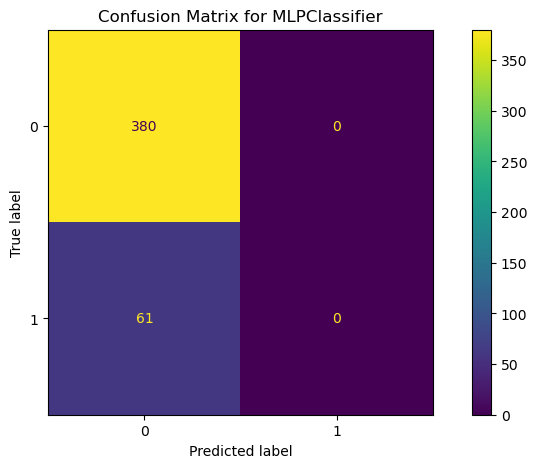

In [12]:
conmat(y_test, pred)

### TSNE

(1029, 30)


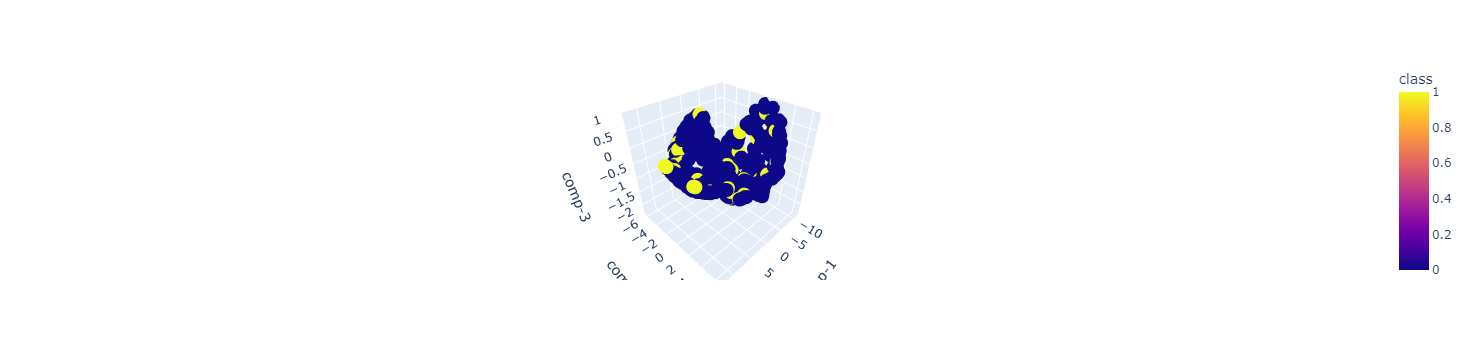

In [13]:
from sklearn.manifold import TSNE
import plotly.express as px
print(X_train.shape)
X_embedded=TSNE(n_components=3, random_state=0)
trans_data=X_embedded.fit_transform(X_train)
df22=pd.DataFrame([])
df22["comp-1"]=trans_data[:,0]
df22["comp-2"]=trans_data[:,1]
df22["comp-3"]=trans_data[:,2]
df22["class"]=y_train.values.astype('int')
df22=df22.dropna()

test_data=X_embedded.fit_transform(X_test)
df222=pd.DataFrame([])
df222["comp-1"]=test_data[:,0]
df222["comp-2"]=test_data[:,1]
df222["comp-3"]=test_data[:,2]
df222["class"]=y_test.values.astype('int')
df222=df222.dropna()

fig = px.scatter_3d(df222, x='comp-1', y='comp-2', z='comp-3',
              color='class')
fig.show()

In [14]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
from IPython.display import clear_output, display
import numpy as np
import ipywidgets as widgets
def f(hidden_layer_sizes,alpha,solver):
    rf_clf =  MLPClassifier(alpha=alpha,hidden_layer_sizes=hidden_layer_sizes,random_state=1, solver=solver,max_iter=300)
    rf_clf.fit(df22.iloc[:,0:-1], df22.iloc[:,-1])
    pred = rf_clf.predict(df222.iloc[:,0:-1])
    conmat(df222.iloc[:,-1], pred)
    print('The accuracy of the RF classifier on test data is {:.2f} out of 1 '.format(rf_clf.score(df222.iloc[:,0:-1], df222.iloc[:,-1])))
    
interact(f,solver=['lbfgs', 'sgd', 'adam'],alpha=np.arange(0.001,1,0.002),hidden_layer_sizes=np.arange(10,500,100));


interactive(children=(Dropdown(description='hidden_layer_sizes', options=(10, 110, 210, 310, 410), value=10), …

In [15]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
from IPython.display import clear_output, display
import ipywidgets as widgets
def f(hidden_layer_sizes,alpha,solver):
    rf_clf =  MLPClassifier(alpha=alpha,hidden_layer_sizes=hidden_layer_sizes,random_state=1, solver=solver,max_iter=300)
    rf_clf.fit(X_train, y_train)
    pred = rf_clf.predict(X_test)
    
    conmat(y_test, pred)
    
    print('The accuracy of the RF classifier on test data is {:.2f} out of 1 '.format(rf_clf.score(X_test, y_test)))
    
interact(f,solver=['lbfgs', 'sgd', 'adam'],alpha=np.arange(0.001,1,0.002),hidden_layer_sizes=np.arange(10,500,100));


interactive(children=(Dropdown(description='hidden_layer_sizes', options=(10, 110, 210, 310, 410), value=10), …

<hr> 

# Task
1. Do the MLP for the above datasets and improve the result using hyperparameter tuning. [Hints](https://scikit-learn.org/stable/modules/grid_search.html)
2. Report classification score

<hr> 

<hr> 

# Home Task
1. Do the MLP for MINST dataset
2. Report classification score

<hr> 